# Guided Project: Star Wars Survey 

For this project, we'll be cleaning and exploring the data set from FiveThirtyEight. They  became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.


## Read in the data and explore column names

In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline



star_wars = pd.read_csv(r'C:\Users\Alima\OneDrive\Рабочий стол\PYTHON\Projects\Star Wars Project\StarWars.csv', encoding='ISO-8859-1')

In [154]:
# Exploring the data to find the odd values
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [155]:
# View all column names
star_wars.columns 

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [156]:
# Drop the rows where the RespondentID is null
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

## Cleaning and Mapping Yes/No Columns

Take a look at the next two columns, which are:

 - Have you seen any of the 6 films in the Star Wars franchise?
 - Do you consider yourself to be a fan of the Star Wars film franchise?

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [157]:
# Create a new dictionary to define a mapping from each value in series 
# to a new value
yes_no = {
    'Yes': True, 
    'No': False
}

# Mapping values 
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [158]:
# Mapping values
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
True     350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.
`
The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.


For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [159]:
# Create a new dictionary to define a mapping from each value in series 
# to a new value 

movies_dict = {
    'Star Wars: Episode I  The Phantom Menace': True, 
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True, 
    'Star Wars: Episode IV  A New Hope': True, 
    'Star Wars: Episode V The Empire Strikes Back': True, 
    'Star Wars: Episode VI Return of the Jedi': True, 
    np.NaN: False
} 

# Pass the dictionary and call map() method on each column

for col in star_wars.columns[3:9]: 
    star_wars[col] = star_wars[col].map(movies_dict)


In [160]:
# Rename column names to better reflect what they represent 
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                                      'Unnamed: 4': 'seen_2',
                                      'Unnamed: 5': 'seen_3',
                                      'Unnamed: 6': 'seen_4',
                                      'Unnamed: 7': 'seen_5',
                                      'Unnamed: 8': 'seen_6'})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns 

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1, 2, 3, 4, 5, 6,` or `NaN`:


- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
- `Unnamed: 10` - How much the respondent liked Star Wars: Episode II Attack of the Clones
- `Unnamed: 11` - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- `Unnamed: 12` - How much the respondent liked Star Wars: Episode IV A New Hope
- `Unnamed: 13` - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` - How much the respondent liked Star Wars: Episode VI Return of the Jedi 

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [161]:
# Convert the values to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [162]:
# Rename column names to better reflect what they represent 
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
                                      'Unnamed: 10': 'ranking_2',
                                      'Unnamed: 11': 'ranking_3',
                                      'Unnamed: 12': 'ranking_4',
                                      'Unnamed: 13': 'ranking_5',
                                      'Unnamed: 14': 'ranking_6'})
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


## Finding the Highest-Ranked Movie 

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

In [163]:
# Calculate the mean of each ranking column
mean_rankings = star_wars[star_wars.columns[9:15]].mean()
mean_rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

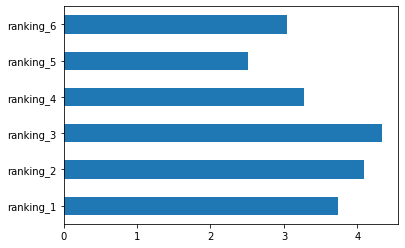

In [164]:
# Plot the results 
mean_rankings.plot.barh()

As we can see, Star Wars: Episode V The Empire Strikes Back is the most favorite among all episodes in the franchise with the lowest average ranking, and in our case the lower the better. The Empire Strikes Back had a significant impact on filmmaking and popular culture, being regarded as a rare example of a sequel that transcends the original. The climax, in which Vader reveals to Luke that he is his father, is often cited as one of the greatest plot twists in cinematic history.

Revenge of the Sith is the least favorite episode with the highest mean ranking. The majority of Star Wars fans find this particular movie ingenuine and poorly filmed. 

## Finding the Most Viewed Movie 

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or `mean()`, they treat Booleans like integers. They consider `True` a `1`, and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [165]:
# Finding mean values of each 'seen' column 
mean_seen = star_wars[star_wars.columns[3:9]].sum()
mean_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

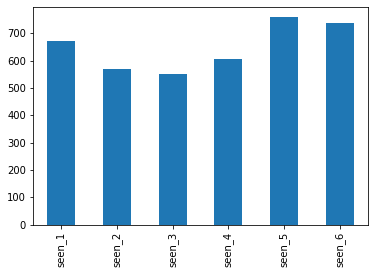

In [166]:
mean_seen.plot.bar()

Looking at this bar plot, we can observe the following: 

- it's clear that the most watched episode among all is Episode V The Empire Strikes Back which also happens to be the most favorite one 
- the least watched and least favorite episode - Revenge of the Sith
- the Episode IV A New Hope was voted the 3rd favorite but if we compare how many times an episode was seen it comes 4th after Episode I.

Therefore, we can observe a certain level of correlation of `seen` columns to `ranking` columns. 


## Exploring the Data by Binary Segments 

We'll segment our data into two groups by gender: `Female`, and `Male`. The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group. 


In [167]:
# Segmenting the data into two groups
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

Firstly, we will compute the average rankings by segment and compare the results with the previous rankings analysis. 

In [168]:
# Finding mean of male rankings
mean_rankings_male = males[males.columns[9:15]].mean()
mean_rankings_male

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

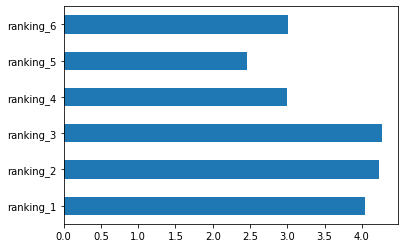

In [169]:
# Plot the results 
mean_rankings_male.plot.barh()

In [170]:
# Finding mean of female rankings
mean_rankings_female = females[females.columns[9:15]].mean()
mean_rankings_female

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

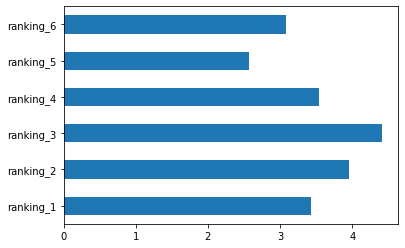

In [171]:
# Plot the results 
mean_rankings_female.plot.barh()

If we compare the average rankings of males and those of both sexes combined, we can see that the only difference is that male fans of Star Wars rated the Episode IV A New Hope higher than Episode VI Return of the Jedi. 

Whereas female fans' average rankings are similar to those of both sexes combined: they favored the Episode V the most, and Episode III the least. 

Second step is to compute the the most viewed episodes among both segments and compare the results. 

In [172]:
# Finding mean values of each 'seen' column by men
mean_seen_male = males[males.columns[3:9]].sum()
mean_seen_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

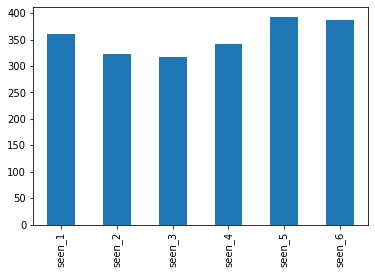

In [173]:
mean_seen_male.plot.bar()

In [174]:
# Finding mean values of each 'seen' column by women
mean_seen_female = females[females.columns[3:9]].sum()
mean_seen_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

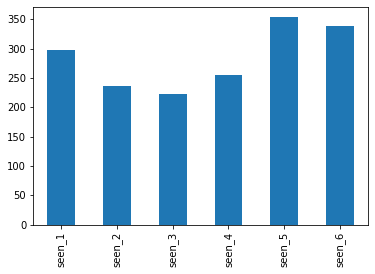

In [175]:
mean_seen_female.plot.bar()

While comparing the results we've noticed that men, women and both combined follow the same pattern from most watched episode to least in the following order: V, VI, I, IV, II, and III. 

## Further Analysis 

### Segment the data based on a non-binary column

We will try to segment the data based on a column `Which character shot first?`, which isn't binary and figure out if there's any interesting patterns. 

In [176]:
star_wars['Which character shot first?'].value_counts(dropna=False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [177]:
# We will fill in the missing values with 'I dont understand this question'
star_wars['Which character shot first?'] = star_wars['Which character shot first?'].fillna("I don't understand this question")

In [178]:
shot_first = star_wars['Which character shot first?'].value_counts(dropna=False)
shot_first

I don't understand this question    664
Han                                 325
Greedo                              197
Name: Which character shot first?, dtype: int64

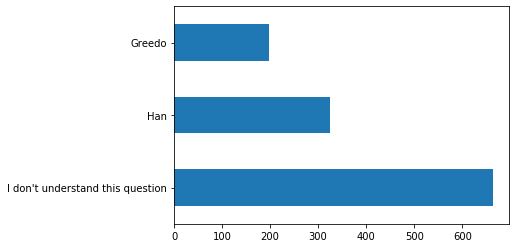

In [179]:
# Plotting the results on a bar plot
shot_first.plot.barh()

Aside from people who didn't understand the question or left the qustion blank, the fans are divided into two camps `Greedo` and `Han`. 

The majority thinks Han shot first. "Han shot first" refers to a controversial change made to a scene, in which Han Solo (Harrison Ford) is confronted by the bounty hunter Greedo (Paul Blake) in the Mos Eisley cantina. In the original version of the scene, Han shoots Greedo dead.

However, some of the fans are still not convinced, and think Greedo was the one who shot first. 

### Clean up columns 15 to 29 

We'll clean up columns `15` to `29`, which contain data on the characters respondents view favorably and unfavorably, and try to answer the following quesions: 

 - Which character do respondents like the most?
 - Which character do respondents dislike the most?
 - Which character is the most controversial (split between likes and dislikes)?

In [180]:
star_wars[star_wars.columns[15:29]]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably
1183,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Neither favorably nor unfavorably (neutral),Very unfavorably,Somewhat favorably,Unfamiliar (N/A),Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably
1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1185,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Very favorably


First step is to change the column names to the respective characters: 

- `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.: Han Solo`
- `Unnamed: 16 : Luke Skywalker`
- `Unnamed: 17 : Princess Leia Organa` 
- `Unnamed: 18 : Anakin Skywalker` 
- `Unnamed: 19 : Obi Wan Kenobi` 
- `Unnamed: 20 : Emperor Palpatine` 
- `Unnamed: 21 : Darth Vader` 
- `Unnamed: 22 : Lando Calrissian` 
- `Unnamed: 23 : Boba Fett` 
- `Unnamed: 24 : C-3PO` 
- `Unnamed: 25 : R2D2` 
- `Unnamed: 26 : Jar Jar Binks` 
- `Unnamed: 27 : Padme Amidala` 
- `Unnamed: 28 : Yoda` 

In [181]:
star_wars = star_wars.rename(columns={'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
                                      'Unnamed: 16': 'Luke Skywalker',
                                      'Unnamed: 17': 'Princess Leia Organa',
                                      'Unnamed: 18': 'Anakin Skywalker',
                                      'Unnamed: 19': 'Obi Wan Kenobi',
                                      'Unnamed: 20': 'Emperor Palpatine',
                                      'Unnamed: 21': 'Darth Vader',
                                      'Unnamed: 22': 'Lando Calrissian',
                                      'Unnamed: 23': 'Boba Fett',
                                      'Unnamed: 24': 'C-3PO',
                                      'Unnamed: 25': 'R2D2',
                                      'Unnamed: 26': 'Jar Jar Binks', 
                                      'Unnamed: 27': 'Padme Amidala',
                                      'Unnamed: 28': 'Yoda'})
star_wars.columns[15:29]

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3PO', 'R2D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

Next, we need to find out how many unique choices the respondets were given to measure the favorability of a given character.

In [182]:
star_wars['Han Solo'].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In order to identify the most/least favorite character, we would have to transfrom the string values into numeric ones to be able to measure them. Therefore, we will map the value in series to numeric values in a such a way: 

- `Very favorably` would be aasigned to the numeric value of 2, which is the highest among all 
- `Somewhat favorably` would be assigned to the numeric value of 1, which is the second highest 
- `Neither favorably nor unfavorably (neutral)`, `Unfamiliar (N/A)` both would be assigned to the value of 0 since neither express (un)/favorability. 
- `Somewhat unfavorably` would be assigned to the value of -1, so when we count the total values the points will be deducted from a least favorable character 
- `Very unfavorably` would be assigned to the value of -2.

In [183]:
# Create a new dictionary to define a mapping from each value in series 
# to a new value 

char_dict = {
    'Very favorably': 2, 
    'Somewhat favorably': 1,
    'Neither favorably nor unfavorably (neutral)': 0, 
    'Unfamiliar (N/A)': 0, 
    'Somewhat unfavorably': -1, 
    'Very unfavorably': -2, 
    np.NaN: 0
} 

# Pass the dictionary and call map() method on each column

for col in star_wars.columns[15:29]: 
    star_wars[col] = star_wars[col].map(char_dict)


In [186]:
# Calculate the total count 
characters_count = star_wars[star_wars.columns[15:29]].sum().sort_values(ascending=True)
characters_count

Jar Jar Binks           -156
Emperor Palpatine         47
Boba Fett                243
Darth Vader              391
Padme Amidala            393
Lando Calrissian         428
Anakin Skywalker         598
C-3PO                   1140
Princess Leia Organa    1280
R2D2                    1287
Luke Skywalker          1304
Obi Wan Kenobi          1319
Yoda                    1330
Han Solo                1361
dtype: int64

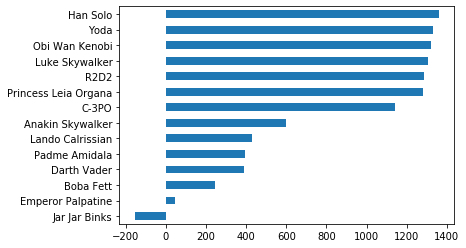

In [187]:
# Plot the final results 
characters_count.plot.barh()

As our bar plot demonstrates, `Han Solo`, `Yoda`, and `Obi Wan Kenobi` are the most favorable in the eyes of the fans of the franchise. Apparently, `Jar Jar Binks` is the least favorable character in Star Wars series and it's the only character that managed to get negative points. 